In [3]:
import sys
sys.path.append('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/')
from trained_untrained_results_funcs import find_best_layer,load_mean_sem_perf
import numpy as np
from matplotlib import pyplot as plt


In [39]:
exp = ['243', '384']

br_labels_dict = {}
num_vox_dict = {}
subjects_dict = {}

data_processed_folder_pereira = f'/data/LLMs/data_processed/pereira/dataset'
data_processed_folder_fed = f'/data/LLMs/data_processed/fedorenko/dataset'
data_processed_folder_blank = f'/data/LLMs/data_processed/blank/dataset'

subjects_storage = {}
network_labels_storage = {}
lang_indices = {}

for e in exp:

    bre = np.load(f'{data_processed_folder_pereira}/networks_{e}.npy', allow_pickle=True)
    network_labels_storage[f"pereira{e}"]  = bre.squeeze()
    num_vox_dict[e] = bre.shape[0]
    subjects_storage[f"pereira{e}"] = np.load(f"{data_processed_folder_pereira}/subjects_{e}.npy", allow_pickle=True).squeeze()
    lang_indices[e] = np.argwhere(bre=='language').squeeze()

subjects_storage['fedorenko']  = np.load(f"{data_processed_folder_fed}/subjects.npy", allow_pickle=True)
subjects_storage['blank'] = np.load(f"{data_processed_folder_blank}/subjects.npy", allow_pickle=True)

network_labels_storage['fedorenko'] = None
network_labels_storage['blank'] = None

subjects_arr_pereira = np.load(f"{data_processed_folder_pereira}/subjects_complete.npy", allow_pickle=True)
networks_arr_pereira = np.load(f"{data_processed_folder_pereira}/network_complete.npy", allow_pickle=True)

resultsPath_base = '/data/LLMs/brainscore/'
                    

### For GPT2 and OASM, the best layer is found in the figure1.py file and saved into a dictionary for future use
### For the Pereira2018 PWR model, there is no selection of layers.

In [51]:
layer_perf_dict, best_layer_blank, layer_perf_best  = find_best_layer(np.arange(3,51), '', '', resultsPath='/data/LLMs/brainscore/results_blank/', subjects=subjects_storage['blank'], dataset='blank', perf='out_of_sample_r2', 
                    selected_network_indices = None, feature_extraction = '', model_name='pos-WN', seed_number=None, 
                    return_SE=False, niter=1)

print("Best layer Blank simple feature space: ", best_layer_blank)

Best layer Blank simple feature space:  12


Best layer Fed feature space:  4.7


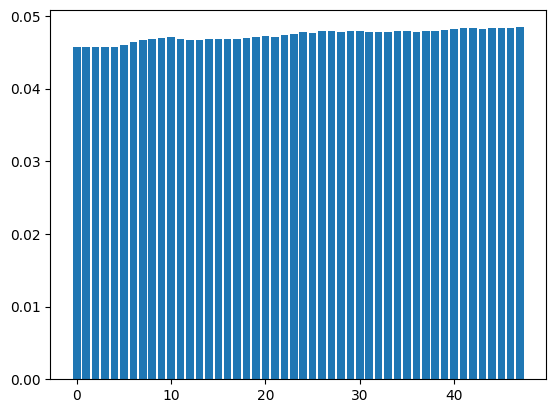

In [52]:
# Due to an indexing error, layer 4.6 was accidently used for Fed, but as is evident from the bar plot 
# the difference in performance is very small so computations were not rerun with layer 4.7
layer_perf_pos_fed = []
for i in np.round(np.arange(0, 4.8, 0.1),2):
    perf_mean = load_mean_sem_perf('pos', 'fedorenko', '', i, niter=1, return_mean=True, print_res=False)
    layer_perf_pos_fed.append(perf_mean)

plt.bar(np.arange(len(layer_perf_pos_fed)), layer_perf_pos_fed)
print("Best layer Fed feature space: ", np.round(np.arange(0, 4.8, 0.1),2)[np.argmax(layer_perf_pos_fed)])

In [46]:
best_layer_pereira_dict_384, best_layer_pereira_gaussian, _  = find_best_layer(np.arange(0,48), '', '_384', 
                        resultsPath='/data/LLMs/brainscore/results_pereira/', subjects=subjects_storage['pereira384'], dataset='pereira', perf='out_of_sample_r2', 
                    selected_network_indices = lang_indices['384'], feature_extraction = '', model_name='gaussian', seed_number=None, 
                    return_SE=False, niter=1)
print("Best layer Pereira (384) simple feature space: ", best_layer_pereira_gaussian)

best_layer_pereira_dict_243, best_layer_pereira_gaussian, _  = find_best_layer(np.arange(0,48), '', '_243', resultsPath='/data/LLMs/brainscore/results_pereira/', 
                                                            subjects=subjects_storage['pereira243'], dataset='pereira', perf='out_of_sample_r2', 
                                                            selected_network_indices = lang_indices['243'], feature_extraction = '', model_name='gaussian', seed_number=None, 
                                                             return_SE=False, niter=1)
print("Best layer Pereira (243) simple feature space: ", best_layer_pereira_gaussian)


_, best_layer_fedorenko_gaussian, _  = find_best_layer(np.arange(0,48), '', '', resultsPath='/data/LLMs/brainscore/results_fedorenko/', subjects=subjects_storage['fedorenko'], dataset='fedorenko', perf='out_of_sample_r2', 
                    selected_network_indices = None, feature_extraction = '', model_name='gaussian', seed_number=None, 
                    return_SE=False, niter=1)
print("Best layer Fedorenko simple feature space: ", best_layer_fedorenko_gaussian)


_, best_layer_blank_gaussian, _  = find_best_layer(np.arange(0,48), '', '', resultsPath='/data/LLMs/brainscore/results_blank/', subjects=subjects_storage['blank'], dataset='blank', perf='out_of_sample_r2', 
                    selected_network_indices = None, feature_extraction = '', model_name='gaussian', seed_number=None, 
                    return_SE=False, niter=1)
print("Best layer Blank simple feature space: ", best_layer_blank_gaussian)


Best layer Pereira (384) simple feature space:  0
Best layer Pereira (243) simple feature space:  45
Best layer Fedorenko simple feature space:  39
Best layer Blank simple feature space:  13


In [4]:
gaussian_best_layer = {'pereira_384': 0, 'pereira_243': 45, 'fedorenko': 39, 'blank': 13}
np.savez('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/best_layer_sigma_info/best_gaussian', **gaussian_best_layer)